<a href="https://colab.research.google.com/github/aditi-138/Sleep_Analysis/blob/main/Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [11]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("sleep_deprivation_dataset_detailed.csv")

Saving sleep_deprivation_dataset_detailed.csv to sleep_deprivation_dataset_detailed (1).csv


In [18]:
print(df.head())

print(df.dtypes)




  Participant_ID  Sleep_Hours  Sleep_Quality_Score  Daytime_Sleepiness  \
0             P1         5.25                   15                  12   
1             P2         8.70                   12                  14   
2             P3         7.39                   17                  10   
3             P4         6.59                   14                   3   
4             P5         3.94                   20                  12   

   Stroop_Task_Reaction_Time  N_Back_Accuracy  Emotion_Regulation_Score  \
0                       1.60            64.20                        12   
1                       2.54            65.27                        21   
2                       3.40            74.28                        35   
3                       3.54            72.42                        25   
4                       3.09            99.72                        60   

   PVT_Reaction_Time  Age  Gender    BMI  Caffeine_Intake  \
0             365.85   35  Female  30.53   

Participant_ID               0
Sleep_Hours                  0
Sleep_Quality_Score          0
Daytime_Sleepiness           0
Stroop_Task_Reaction_Time    0
N_Back_Accuracy              0
Emotion_Regulation_Score     0
PVT_Reaction_Time            0
Age                          0
Gender                       0
BMI                          0
Caffeine_Intake              0
Physical_Activity_Level      0
Stress_Level                 0
dtype: int64


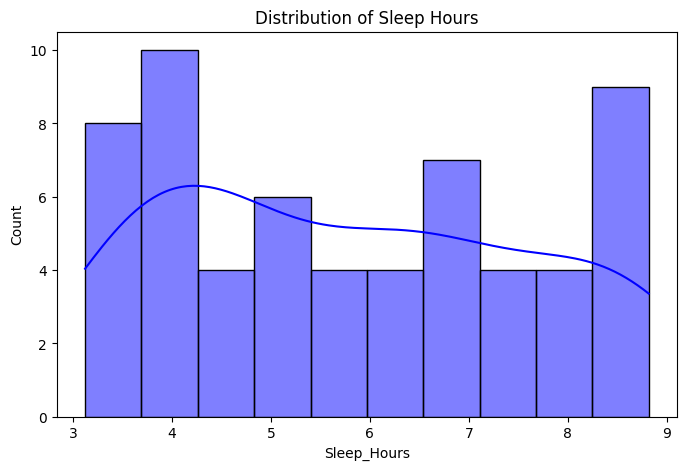

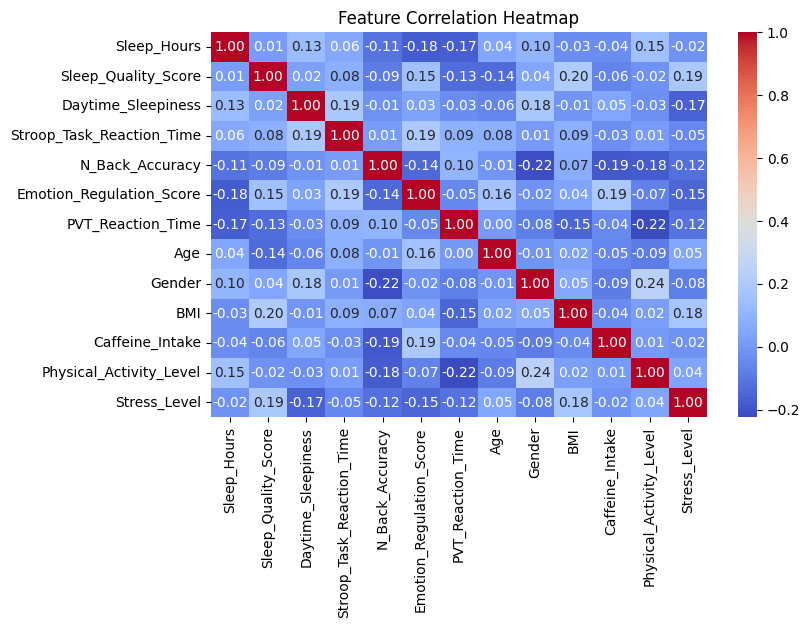

In [19]:
print(df.isnull().sum())
plt.figure(figsize=(8,5))
sns.histplot(df['Sleep_Hours'], bins=10, kde=True, color="blue")
plt.title("Distribution of Sleep Hours")
plt.show()
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df_numeric = df.select_dtypes(include=['number'])
#heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
if 'Gender' in df.columns:
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
    X_reg = df[['Sleep_Hours', 'Caffeine_Intake', 'Stress_Level', 'BMI']]
y_reg = df['Stroop_Task_Reaction_Time']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_reg = lr.predict(X_test)
print("\nRegression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_reg):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_reg):.2f}")
df['Sleep_Quality_Category'] = df['Sleep_Quality_Score'].apply(lambda x: 'Good' if x >= 6 else 'Poor')

X_clf = df[['Sleep_Hours', 'Caffeine_Intake', 'Stress_Level', 'BMI']]
y_clf = df['Sleep_Quality_Category']


Regression Model Evaluation:
Mean Squared Error (MSE): 1.07
R² Score: -0.51


In [27]:
y_clf = LabelEncoder().fit_transform(y_clf)
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print("\n Classification Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_clf))


 Classification Model Evaluation:
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.50      0.25      0.33         4

    accuracy                           0.67        12
   macro avg       0.60      0.56      0.56        12
weighted avg       0.63      0.67      0.63        12



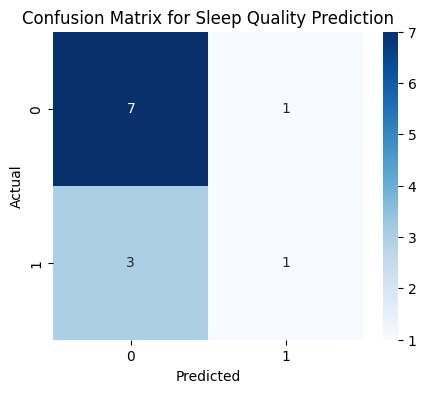

In [28]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix for Sleep Quality Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()